<a href="https://colab.research.google.com/github/pacomm5/COVID-19/blob/master/MASTER_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VAMOS A HACER UN CLUSTER DE TODOS LOS CLIENTES. 

In [1]:
!pip install yellowbrick

     |████████████████████████████████| 274 kB 8.1 MB/s 


In [2]:
# Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
# Hide unnecessary warnings
import warnings
warnings.filterwarnings('ignore')
# Clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
pd.plotting.register_matplotlib_converters()
import math
from matplotlib import gridspec
from sklearn.preprocessing import MinMaxScaler

In [3]:
df_importado = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TRABAJO MASTER/df_SI_est.csv", sep="|")

In [4]:
df_importado.head()

,Fecha,id_cl,anno,mes,importe1,importe2,facturacion_ant,capital,gastos_personal,impuesto_sociedades,cod_sector,des_sector,provincia,rama_actividad,desc_actividad,PIB,cotiz_empleadores,imp2_tot_cl,peso_imp2,imp_2m,imp_3m,imp_4m,imp_5m,imp_6m,imp_7m,imp_8m,imp_9m,imp_10m,imp_11m,imp_12m,slope,intercept,trend,estacional
0,2017-01-01,2113,2017,1,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Comercio al por mayor e intermediarios del com...,28,G,0,0.0,0.0,983.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,si
1,2017-02-01,2113,2017,2,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Comercio al por mayor e intermediarios del com...,28,G,0,0.0,0.0,983.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,si
2,2017-03-01,2113,2017,3,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Comercio al por mayor e intermediarios del com...,28,G,0,0.0,0.0,983.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,si
3,2017-04-01,2113,2017,4,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Comercio al por mayor e intermediarios del com...,28,G,0,0.0,0.0,983.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,si
4,2017-05-01,2113,2017,5,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Comercio al por mayor e intermediarios del com...,28,G,0,0.0,0.0,983.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,si


In [5]:
df_importado["provincia"] = df_importado["provincia"].apply(str)
df_importado["cod_sector"] = df_importado["cod_sector"].apply(str)
df_importado["id_cl"] = df_importado["id_cl"].apply(str)
df_importado["anno"] = df_importado["anno"].apply(str)
df_importado["mes"] = df_importado["mes"].apply(str)

df_importado.dtypes

Fecha                   object
id_cl                   object
anno                    object
mes                     object
importe1               float64
importe2               float64
facturacion_ant        float64
capital                float64
gastos_personal        float64
impuesto_sociedades    float64
cod_sector              object
des_sector              object
provincia               object
rama_actividad          object
desc_actividad          object
PIB                    float64
cotiz_empleadores      float64
imp2_tot_cl            float64
peso_imp2              float64
imp_2m                 float64
imp_3m                 float64
imp_4m                 float64
imp_5m                 float64
imp_6m                 float64
imp_7m                 float64
imp_8m                 float64
imp_9m                 float64
imp_10m                float64
imp_11m                float64
imp_12m                float64
slope                  float64
intercept              float64
trend   

In [6]:
df_importado.head()

,Fecha,id_cl,anno,mes,importe1,importe2,facturacion_ant,capital,gastos_personal,impuesto_sociedades,cod_sector,des_sector,provincia,rama_actividad,desc_actividad,PIB,cotiz_empleadores,imp2_tot_cl,peso_imp2,imp_2m,imp_3m,imp_4m,imp_5m,imp_6m,imp_7m,imp_8m,imp_9m,imp_10m,imp_11m,imp_12m,slope,intercept,trend,estacional
0,2017-01-01,2113,2017,1,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Comercio al por mayor e intermediarios del com...,28,G,0,0.0,0.0,983.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,si
1,2017-02-01,2113,2017,2,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Comercio al por mayor e intermediarios del com...,28,G,0,0.0,0.0,983.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,si
2,2017-03-01,2113,2017,3,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Comercio al por mayor e intermediarios del com...,28,G,0,0.0,0.0,983.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,si
3,2017-04-01,2113,2017,4,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Comercio al por mayor e intermediarios del com...,28,G,0,0.0,0.0,983.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,si
4,2017-05-01,2113,2017,5,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Comercio al por mayor e intermediarios del com...,28,G,0,0.0,0.0,983.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,si


In [7]:
df_importado.dtypes

Fecha                   object
id_cl                   object
anno                    object
mes                     object
importe1               float64
importe2               float64
facturacion_ant        float64
capital                float64
gastos_personal        float64
impuesto_sociedades    float64
cod_sector              object
des_sector              object
provincia               object
rama_actividad          object
desc_actividad          object
PIB                    float64
cotiz_empleadores      float64
imp2_tot_cl            float64
peso_imp2              float64
imp_2m                 float64
imp_3m                 float64
imp_4m                 float64
imp_5m                 float64
imp_6m                 float64
imp_7m                 float64
imp_8m                 float64
imp_9m                 float64
imp_10m                float64
imp_11m                float64
imp_12m                float64
slope                  float64
intercept              float64
trend   

In [31]:
#df_copia1 = df_importado.copy()
df_importado_red = df_importado[["Fecha","id_cl","importe2"]]
df_importado_red

,Fecha,id_cl,importe2
0,2017-01-01,2113,0.0
1,2017-02-01,2113,0.0
2,2017-03-01,2113,0.0
3,2017-04-01,2113,0.0
4,2017-05-01,2113,0.0
...,...,...,...
314023,2019-08-01,175444,658.0
314024,2019-09-01,175444,1054.0
314025,2019-10-01,175444,1880.0
314026,2019-11-01,175444,1678.0


In [32]:
df_importado_red.dtypes

Fecha        object
id_cl        object
importe2    float64
dtype: object

In [27]:
from sklearn import preprocessing
s_scaler = preprocessing.StandardScaler()
df_importado_red_s = s_scaler.fit_transform(df_importado_red)
df_importado_red_s

array([[-0.03863816],
       [-0.03863816],
       [-0.03863816],
       ...,
       [-0.01200833],
       [-0.01486962],
       [-0.01492628]])

In [16]:
df_copia3_tras = df_copia3.pivot(index='id_cl', columns='Fecha', values='imp_2m')
df_copia3_tras = df_copia3_tras.reset_index()
df_copia3_tras


Fecha,id_cl,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01
0,100028,NaN,NaN,0.0,0.0,0.0,9.0,9.0,9.0,9.0,49.0,46.0,43.0,41.0,39.0,38.0,36.0,36.0,39.0,30.0,36.0,30.0,29.0,29.0,29.0,29.0,29.0,30.0,30.0,28.0,28.0,28.0,28.0,29.0,29.0,29.0,30.0
1,100030,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,9.0,10.0,10.0,10.0,10.0,10.0,11.0,11.0,11.0,11.0,11.0,12.0,12.0,12.0,12.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
2,100036,NaN,NaN,156.0,0.0,171.0,156.0,165.0,178.0,189.0,200.0,205.0,232.0,302.0,321.0,358.0,357.0,328.0,270.0,254.0,284.0,243.0,235.0,294.0,223.0,317.0,326.0,320.0,332.0,250.0,251.0,243.0,258.0,245.0,250.0,224.0,226.0
3,100050,NaN,NaN,3.0,4.0,25.0,25.0,26.0,27.0,29.0,29.0,29.0,15.0,18.0,21.0,22.0,23.0,24.0,30.0,30.0,30.0,29.0,30.0,29.0,30.0,30.0,29.0,29.0,30.0,30.0,30.0,28.0,29.0,30.0,30.0,30.0,27.0
4,100053,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46528,99941,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,38.0,1.0,14.0,14.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46529,99954,NaN,NaN,30.0,30.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,30.0,29.0,0.0,0.0,0.0,0.0,30.0,24.0,25.0,28.0,27.0,28.0,27.0,29.0,28.0,25.0
46530,99961,NaN,NaN,101.0,100.0,94.0,99.0,100.0,96.0,118.0,108.0,113.0,112.0,60.0,34.0,60.0,64.0,62.0,15.0,7.0,5.0,1.0,37.0,27.0,13.0,23.0,35.0,11.0,45.0,0.0,67.0,67.0,67.0,67.0,68.0,68.0,68.0
46531,99966,NaN,NaN,8.0,0.0,0.0,0.0,8.0,3.0,9.0,6.0,5.0,11.0,8.0,4.0,1.0,3.0,2.0,10.0,12.0,4.0,19.0,19.0,8.0,21.0,14.0,16.0,40.0,33.0,27.0,23.0,24.0,61.0,54.0,55.0,48.0,50.0


In [17]:
df_copia3_tras.dtypes

Fecha
id_cl          object
2017-01-01    float64
2017-02-01    float64
2017-03-01    float64
2017-04-01    float64
2017-05-01    float64
2017-06-01    float64
2017-07-01    float64
2017-08-01    float64
2017-09-01    float64
2017-10-01    float64
2017-11-01    float64
2017-12-01    float64
2018-01-01    float64
2018-02-01    float64
2018-03-01    float64
2018-04-01    float64
2018-05-01    float64
2018-06-01    float64
2018-07-01    float64
2018-08-01    float64
2018-09-01    float64
2018-10-01    float64
2018-11-01    float64
2018-12-01    float64
2019-01-01    float64
2019-02-01    float64
2019-03-01    float64
2019-04-01    float64
2019-05-01    float64
2019-06-01    float64
2019-07-01    float64
2019-08-01    float64
2019-09-01    float64
2019-10-01    float64
2019-11-01    float64
2019-12-01    float64
dtype: object

In [18]:
df_ts = df_copia3_tras.iloc[:,1:]
df_ts = pd.DataFrame(df_ts.sum(axis=0)).reset_index()
df_ts.columns = ["Fecha", "importe2"]
df_ts["Fecha"] = pd.to_datetime(df_ts["Fecha"])
df_ts.set_index("Fecha", inplace=True)
df_ts.tail()

,importe2
Fecha,
2019-08-01,99527030.0
2019-09-01,94888235.0
2019-10-01,95745182.0
2019-11-01,93359268.0
2019-12-01,96152994.0


In [19]:
df_ts.dtypes

importe2    float64
dtype: object

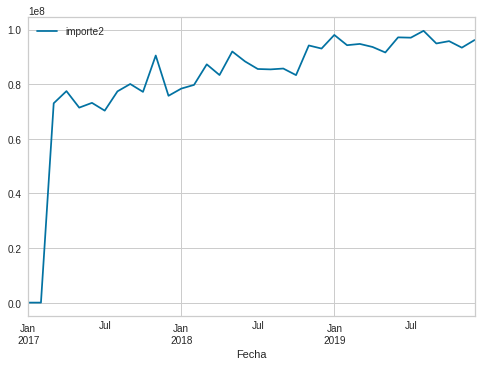

In [20]:
df_ts.plot()

In [21]:
df_by_cl = df_copia3_tras.groupby("id_cl").agg(sum).reset_index()
df_by_cl.tail()

Fecha,id_cl,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01
46528,99941,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,38.0,1.0,14.0,14.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46529,99954,0.0,0.0,30.0,30.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,30.0,29.0,0.0,0.0,0.0,0.0,30.0,24.0,25.0,28.0,27.0,28.0,27.0,29.0,28.0,25.0
46530,99961,0.0,0.0,101.0,100.0,94.0,99.0,100.0,96.0,118.0,108.0,113.0,112.0,60.0,34.0,60.0,64.0,62.0,15.0,7.0,5.0,1.0,37.0,27.0,13.0,23.0,35.0,11.0,45.0,0.0,67.0,67.0,67.0,67.0,68.0,68.0,68.0
46531,99966,0.0,0.0,8.0,0.0,0.0,0.0,8.0,3.0,9.0,6.0,5.0,11.0,8.0,4.0,1.0,3.0,2.0,10.0,12.0,4.0,19.0,19.0,8.0,21.0,14.0,16.0,40.0,33.0,27.0,23.0,24.0,61.0,54.0,55.0,48.0,50.0
46532,99989,0.0,0.0,371.0,373.0,375.0,377.0,379.0,196.0,198.0,200.0,202.0,204.0,177.0,208.0,210.0,212.0,214.0,187.0,189.0,191.0,193.0,195.0,197.0,228.0,230.0,233.0,235.0,237.0,239.0,241.0,243.0,246.0,248.0,250.0,252.0,254.0


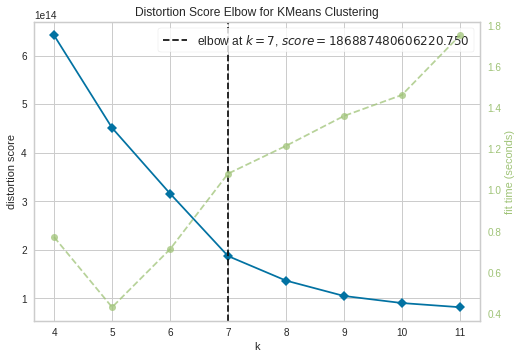

In [35]:
model = KMeans(init='k-means++') # esto crea el modelo
visualizer = KElbowVisualizer(model, k=(4,12),metric="distortion") # establecemos un rango de Kluster de 20 a 30
visualizer.fit(df_by_cl.iloc[:,1:]) 
visualizer.show()
# del dibujo sacamos que el numero de clusters es 24

In [36]:
# Clustering with 24 clusters
kmeans = KMeans(n_clusters=7,init='k-means++',random_state=0)  
y_kmeans = kmeans.fit_predict(df_by_cl.iloc[:,1:])  
df_by_cl["Cluster"] = y_kmeans

In [51]:
df_by_cl['2017-12-01']

0         43.0
1          0.0
2        232.0
3         15.0
4          0.0
         ...  
46528     38.0
46529      0.0
46530    112.0
46531     11.0
46532    204.0
Name: 2017-12-01, Length: 46533, dtype: float64

In [52]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [53]:
for i in range(1,7):
    #print("Clients in cluster {} are {}".format(i,list(df_by_cl[df_by_cl.Cluster==i]["id_cl"].unique())))
    print("Clients in cluster {} are {}".format(i,len(list(df_by_cl[df_by_cl.Cluster==i]["id_cl"].unique()))))

Clients in cluster 1 are 1
Clients in cluster 2 are 1
Clients in cluster 3 are 3
Clients in cluster 4 are 45
Clients in cluster 5 are 1
Clients in cluster 6 are 1


In [48]:
ivas#kmeans_data["Cluster"] = "Cluster" + pd.Series((kmeans.labels_ +1).astype(str))
kmeans['cluster'].value_counts()

TypeError: ignored

In [25]:
cluster_labels =['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3','Cluster4', 'Cluster5',
                    'Cluster6', 'Cluster7', 'Cluster8', 'Cluster9','Cluster10', 'Cluster11',
                    'Cluster12', 'Cluster13', 'Cluster14', 'Cluster15','Cluster16', 'Cluster17',
                    'Cluster18', 'Cluster19', 'Cluster20', 'Cluster21', 'Cluster22','Cluster23','Cluster24']

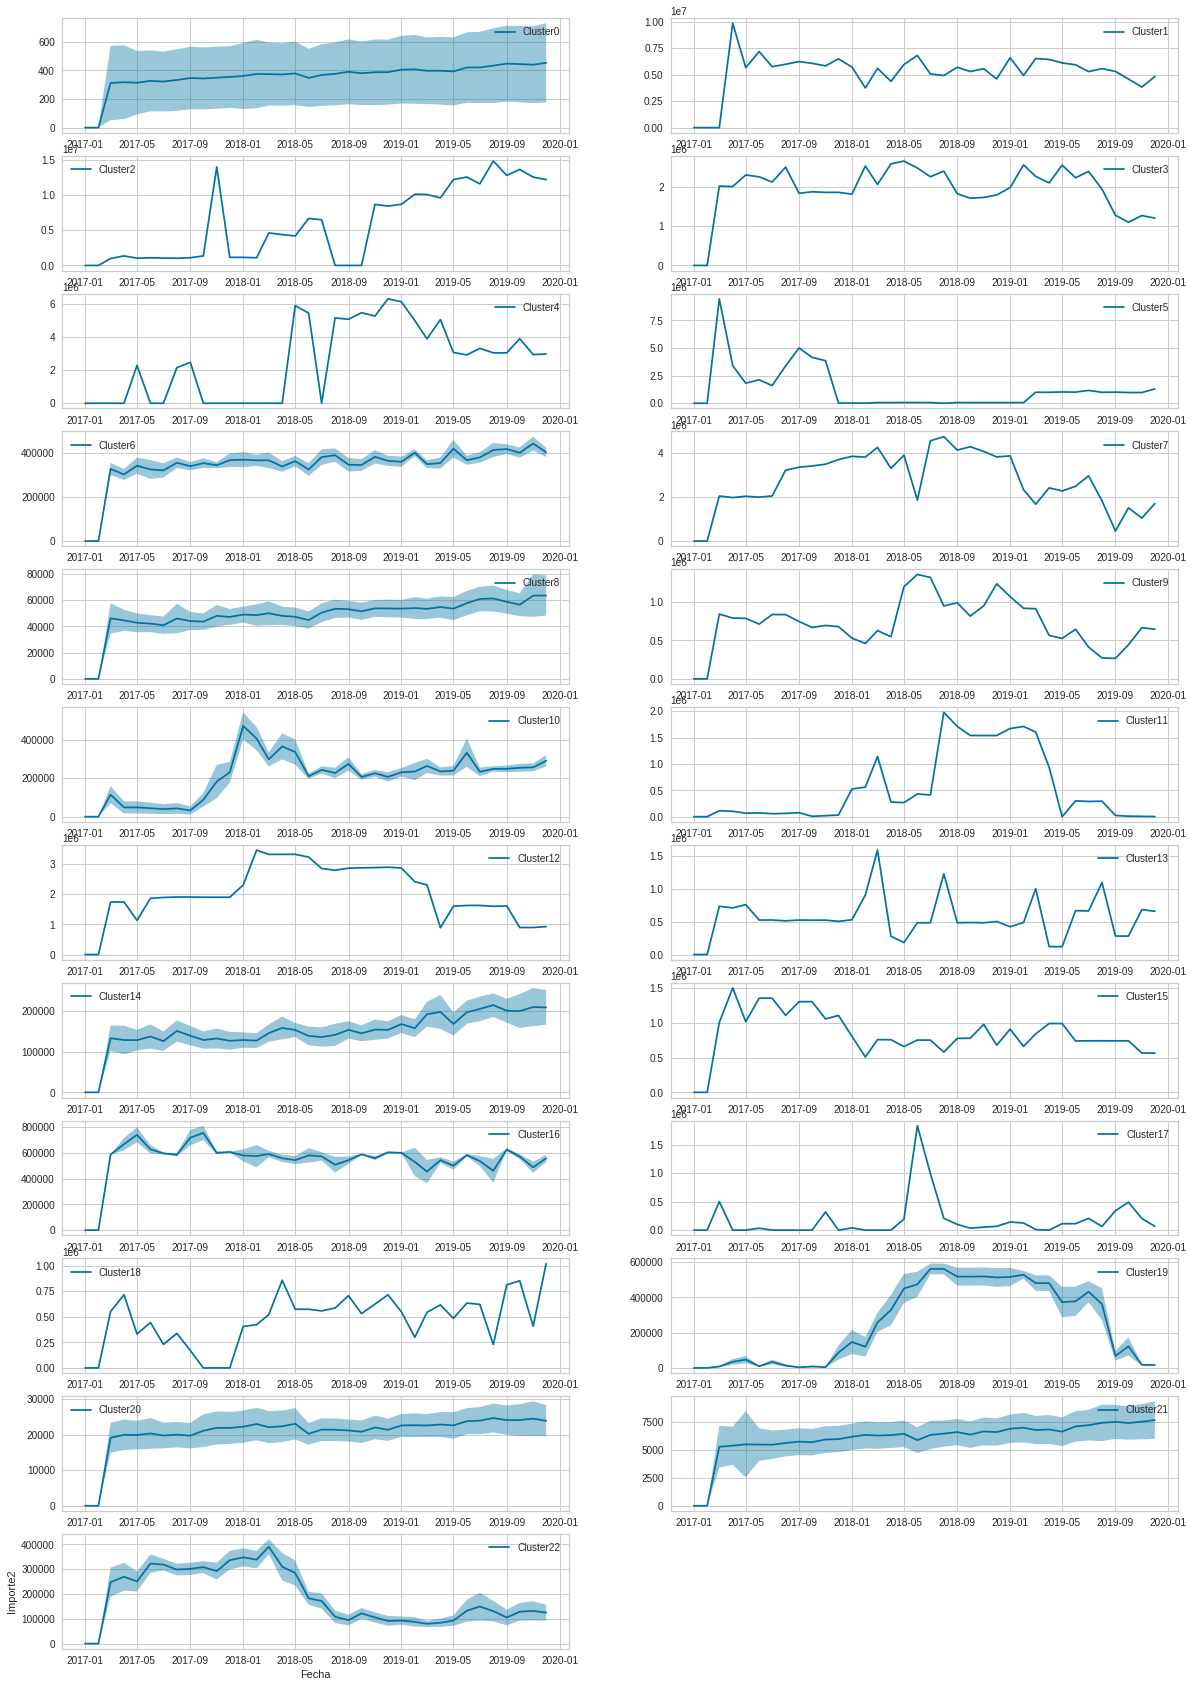

In [34]:
## For generating 95% confidence interval 
def get_cluster_intervals(cluster):
    df = pd.DataFrame() 
    df["mean"] = cluster.mean(axis=0)
    df["lower_bound"] = df["mean"] - (1.96 * cluster.std(axis=0))/np.sqrt(len(df["mean"]))
    df["upper_bound"] = df["mean"] + (1.96 * cluster.std(axis=0))/np.sqrt(len(df["mean"]))
    df.index = df_ts.index
    return df
clusters = [get_cluster_intervals(df_by_cl[df_by_cl["Cluster"]==n].iloc[:,1:-1]) for n in range(23)]
K = 23
cols = 2
rows = int(math.ceil(K / cols))
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure( figsize=(20, 30))
for n in range(K):
    ax = fig.add_subplot(gs[n])
    ax.plot(clusters[n].index,clusters[n]["mean"],label=cluster_labels[n])
    ax.fill_between(clusters[n].index, clusters[n]["lower_bound"], clusters[n]["upper_bound"], alpha=.4)
    plt.legend()
    
plt.xlabel('Fecha')
plt.ylabel('Importe2')
plt.show()
fig.tight_layout()